In [1]:
import sys
sys.path.append("../..")

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib
import os
from surgeNN import io

In [2]:
#configure the script
tgs        = ['esbjerg-esb-dnk-dmi.csv','den_helder-denhdr-nld-rws.csv']
qnts = np.array([.95,.98,.99,.995]) #quantiles, don't touch

max_timesteps_between_extremes = 3

In [4]:
multi_output = io.Output('/home/jovyan/surgeNN/results/nns_multisite_test/multi_site/codec/chronological/performance/lstm/')
multi_output.open_performance_data(tgs,stored_per_tg=False)
multi_output = multi_output.data.sel(max_timesteps_between_extremes=max_timesteps_between_extremes).load()


single_output = io.Output('/home/jovyan/surgeNN/results/nns_multisite_test/single_site/codec/chronological/performance/lstm/')
single_output.open_performance_data(tgs)
single_output.data = single_output.data.sel(max_timesteps_between_extremes=3).load()

observed_thresholds = single_output.observed_thresholds()
single_output = single_output.data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


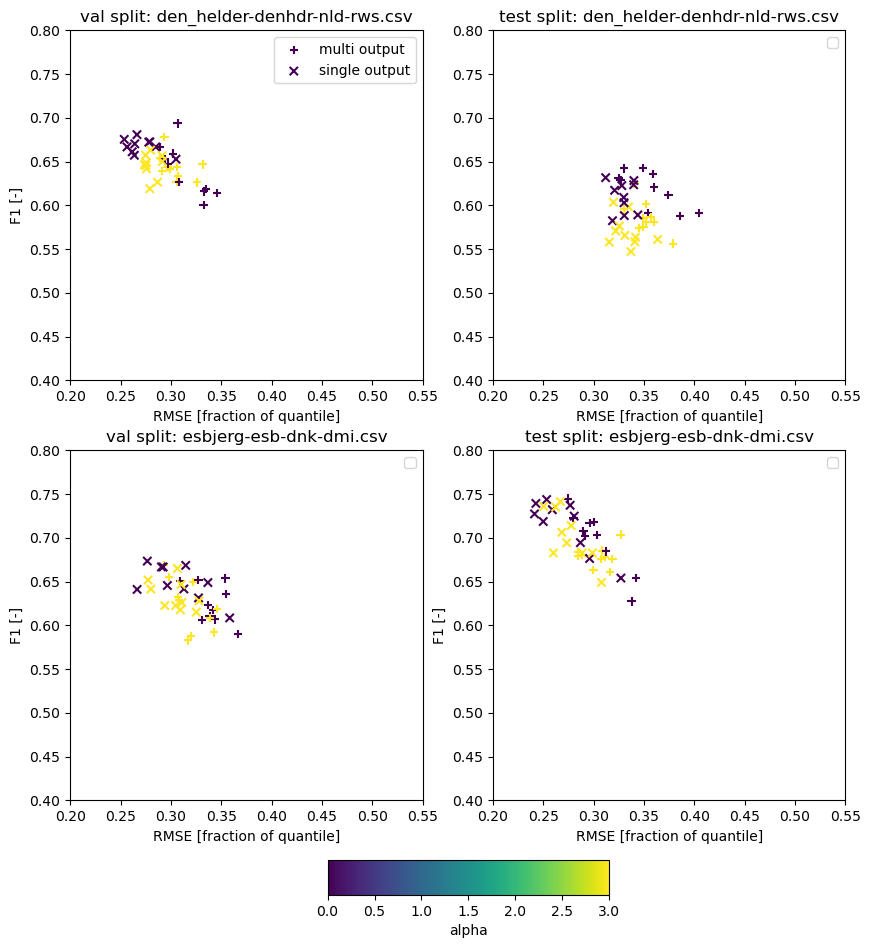

In [8]:
fig=plt.figure(figsize=(10,10))

tg = 'den_helder-denhdr-nld-rws.csv'
out_q = .99
split='val'

ax1 = plt.subplot(2, 2, 1)
s=ax1.scatter(multi_output.sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q)/observed_thresholds.sel(tg=tg).sel(quantile=out_q).sel(split=split),
            multi_output.sel(tg=tg).f1.sel(split=split,quantile=out_q),c=multi_output.hyperparameters.sel(split=split,p='dl_alpha'),marker='+',label='multi output')


s=ax1.scatter(single_output.sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q)/observed_thresholds.sel(tg=tg).sel(quantile=out_q).sel(split=split),
            single_output.sel(tg=tg).f1.sel(split=split,quantile=out_q),c=single_output.hyperparameters.sel(tg=tg,split=split,p='dl_alpha'),marker='x',label='single output')

#ax1.colorbar(s)    
ax1.legend()
ax1.set_xlim([.2,.55])
ax1.set_ylim([.4,.8])
ax1.set_xlabel('RMSE [fraction of quantile]')
ax1.set_ylabel('F1 [-]')
ax1.set_title(split +' split: '+tg)

split='test'

ax2 = plt.subplot(2, 2, 2)
s=ax2.scatter(multi_output.sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q)/observed_thresholds.sel(tg=tg).sel(quantile=out_q).sel(split=split),
            multi_output.sel(tg=tg).f1.sel(split=split,quantile=out_q),c=multi_output.hyperparameters.sel(split=split,p='dl_alpha'),marker='+')

s=ax2.scatter(single_output.sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q)/observed_thresholds.sel(tg=tg).sel(quantile=out_q).sel(split=split),
            single_output.sel(tg=tg).f1.sel(split=split,quantile=out_q),c=single_output.hyperparameters.sel(tg=tg,split=split,p='dl_alpha'),marker='x')

#ax1.colorbar(s)    
ax2.legend()
ax2.set_xlim([.2,.55])
ax2.set_ylim([.4,.8])
ax2.set_xlabel('RMSE [fraction of quantile]')
ax2.set_title(split +' split: '+tg)


split='val'
tg = 'esbjerg-esb-dnk-dmi.csv'
ax1 = plt.subplot(2, 2, 3)
s=ax1.scatter(multi_output.sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q)/observed_thresholds.sel(tg=tg).sel(quantile=out_q).sel(split=split),
            multi_output.sel(tg=tg).f1.sel(split=split,quantile=out_q),c=multi_output.hyperparameters.sel(split=split,p='dl_alpha'),marker='+')

s=ax1.scatter(single_output.sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q)/observed_thresholds.sel(tg=tg).sel(quantile=out_q).sel(split=split),
            single_output.sel(tg=tg).f1.sel(split=split,quantile=out_q),c=single_output.hyperparameters.sel(tg=tg,split=split,p='dl_alpha'),marker='x')

#ax1.colorbar(s)    
ax1.legend()
ax1.set_xlim([.2,.55])
ax1.set_ylim([.4,.8])
ax1.set_xlabel('RMSE [fraction of quantile]')
ax1.set_ylabel('F1 [-]')
ax1.set_title(split +' split: '+tg)

split='test'
tg = 'esbjerg-esb-dnk-dmi.csv'
ax1 = plt.subplot(2, 2, 4)
s=ax1.scatter(multi_output.sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q)/observed_thresholds.sel(tg=tg).sel(quantile=out_q).sel(split=split),
            multi_output.sel(tg=tg).f1.sel(split=split,quantile=out_q),c=multi_output.hyperparameters.sel(split=split,p='dl_alpha'),marker='+')


s=ax1.scatter(single_output.sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q)/observed_thresholds.sel(tg=tg).sel(quantile=out_q).sel(split=split),
            single_output.sel(tg=tg).f1.sel(split=split,quantile=out_q),c=single_output.hyperparameters.sel(tg=tg,split=split,p='dl_alpha'),marker='x')

#ax1.colorbar(s)    
ax1.legend()
ax1.set_xlim([.2,.55])
ax1.set_ylim([.4,.8])
ax1.set_xlabel('RMSE [fraction of quantile]')
ax1.set_ylabel('F1 [-]')
ax1.set_title(split +' split: '+tg)

cax=inset_axes(ax2,width="100%", height="100%",bbox_to_anchor=(-.45, -.25,.8,.1),bbox_transform=ax1.transAxes)
fig.colorbar(s, cax=cax,orientation='horizontal',label='alpha')


In [10]:
tg = 'den_helder-denhdr-nld-rws.csv'
out_q = .99
split='test'
print(np.mean(multi_output.sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q),axis=0).values)
print(np.mean(single_output.sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q),axis=0).values)

[0.27002642 0.2659472 ]
[0.24924189 0.25211717]


In [12]:
tg = 'esbjerg-esb-dnk-dmi.csv'
out_q = .99
split='test'
print(np.mean(multi_output.sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q),axis=0).values)
print(np.mean(single_output.sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q),axis=0).values)

[0.32696009 0.3288138 ]
[0.29302969 0.29745156]


In [16]:
tg = 'den_helder-denhdr-nld-rws.csv'
out_q = .99
split='test'
print(np.mean(multi_output.sel(tg=tg).f1.sel(split=split,quantile=out_q),axis=0).values)
print(np.mean(single_output.sel(tg=tg).f1.sel(split=split,quantile=out_q),axis=0).values)

[0.61828773 0.58606692]
[0.60942981 0.57022413]


In [15]:
tg = 'esbjerg-esb-dnk-dmi.csv'
out_q = .99
split='test'
print(np.mean(multi_output.sel(tg=tg).f1.sel(split=split,quantile=out_q),axis=0).values)
print(np.mean(single_output.sel(tg=tg).f1.sel(split=split,quantile=out_q),axis=0).values)

[0.69808659 0.67861803]
[0.714748   0.70235114]
